### Ames, Iowa Exploratory Data Analysis + Basic Linear Regression

- To gain in understanding this data set, it was necessary to understand which variables matter the most to predict our target (Sale Price).  Using some domain knowledge on what typically matters in real estate pricing (square footage, number of floors, size of the lot, etx), we can choose a starting point for this EDA and construct a basic model.

Starting with only the train.csv data:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style('darkgrid')


train_df = pd.read_pickle('./assets/train_cleaned.pkl')

In [2]:
train_df.corr()['SalePrice'].abs().sort_values(ascending = False)[0:20]

SalePrice         1.000000
Overall Qual      0.800207
Exter Qual        0.712146
Gr Liv Area       0.697038
Kitchen Qual      0.692336
Garage Area       0.649897
Garage Cars       0.647781
Total Bsmt SF     0.629303
1st Flr SF        0.618486
Bsmt Qual         0.612188
Year Built        0.571849
Garage Yr Blt     0.571849
Garage Finish     0.557839
Year Remod/Add    0.550370
Fireplace Qu      0.538925
Full Bath         0.537969
TotRms AbvGrd     0.504014
Mas Vnr Area      0.503579
Fireplaces        0.471093
Heating QC        0.458354
Name: SalePrice, dtype: float64

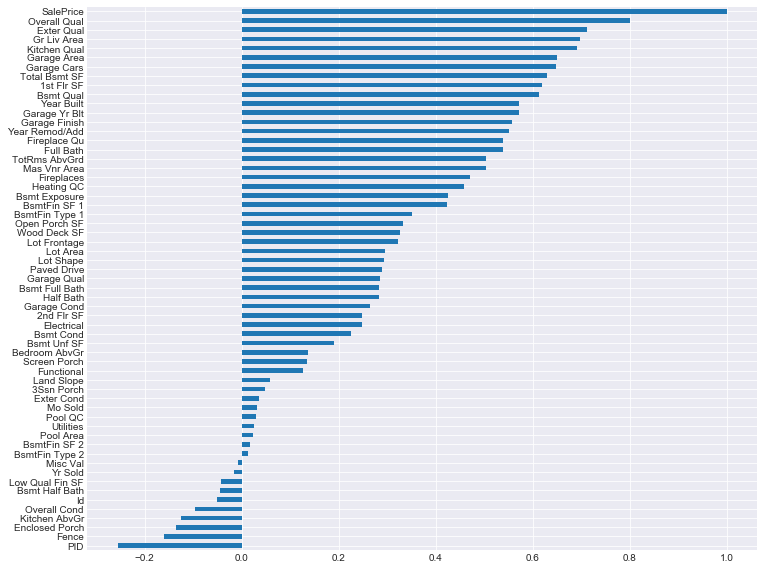

In [3]:
plt.figure(figsize = (12,10))
train_df._get_numeric_data().corr()['SalePrice'].sort_values().plot(kind = 'barh')

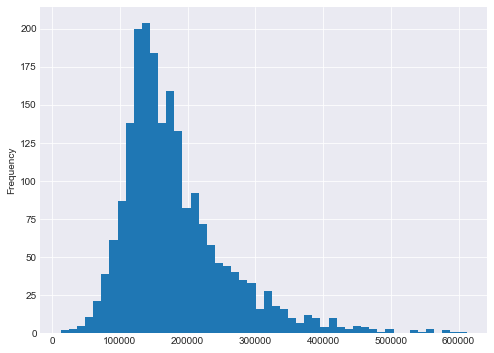

In [4]:
plt.figure(figsize = (8,6))
train_df['SalePrice'].plot(kind='hist', bins = 50)

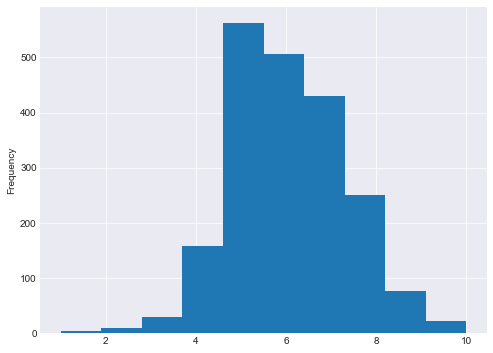

In [5]:
plt.figure(figsize = (8,6))
train_df['Overall Qual'].plot(kind='hist', bins = 10)

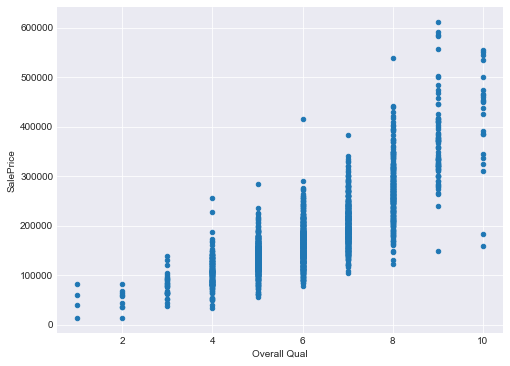

In [6]:
train_df.plot(y = 'SalePrice', x = 'Overall Qual', kind='scatter', figsize = (8,6))

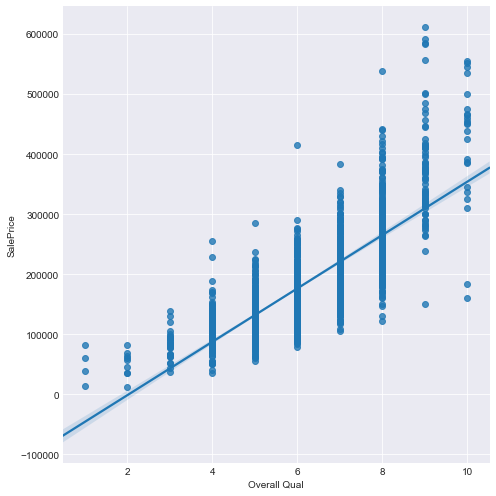

In [7]:
sns.lmplot('Overall Qual', 'SalePrice', train_df, size = 7)

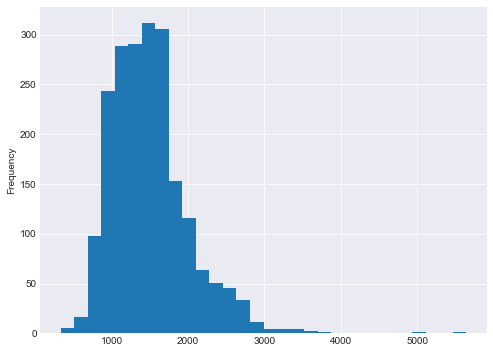

In [8]:
plt.figure(figsize = (8,6))
train_df['Gr Liv Area'].plot(kind = 'hist', bins = 30)

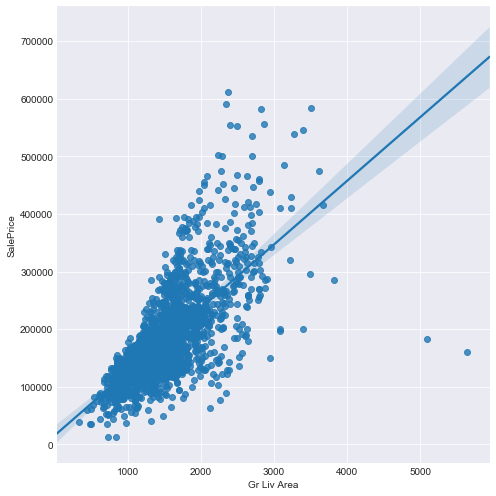

In [9]:
sns.lmplot('Gr Liv Area', 'SalePrice', train_df, size = 7)

In [10]:
predictors = train_df._get_numeric_data().corr()['SalePrice'].sort_values(ascending = False).keys()[1:9]
predictors

Index(['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual',
       'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF'],
      dtype='object')

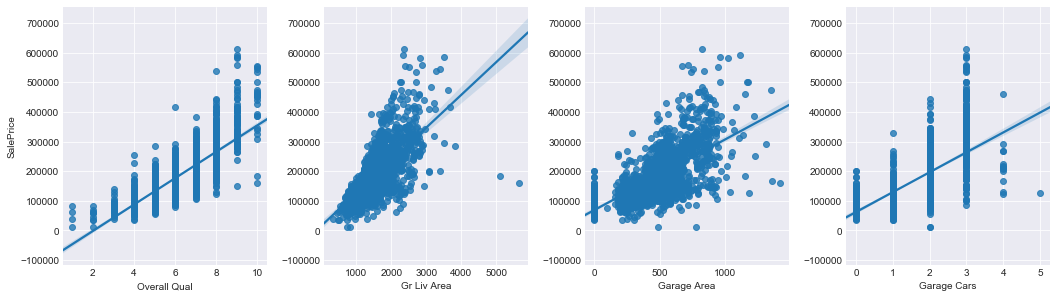

In [11]:
data = train_df[['SalePrice','Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars']]

y_vars = ['SalePrice']

x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars']

g = sns.pairplot(data = data,y_vars = y_vars, x_vars = x_vars,kind = 'reg')

g.fig.set_size_inches(15,5)

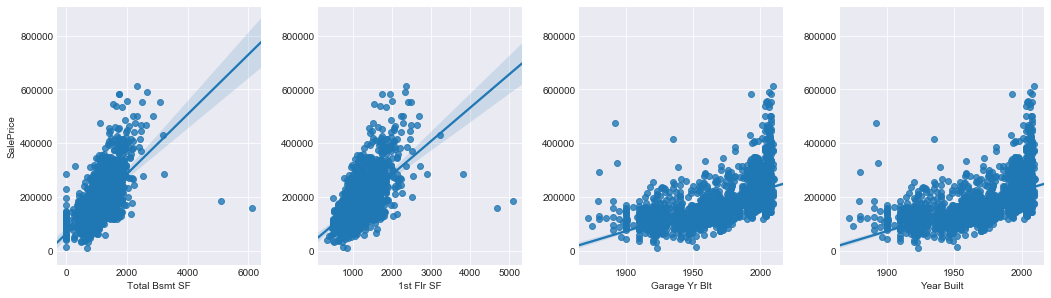

In [12]:
data = train_df[['SalePrice','Total Bsmt SF', '1st Flr SF', 'Garage Yr Blt', 'Year Built']]

y_vars = ['SalePrice']

x_vars = ['Total Bsmt SF', '1st Flr SF', 'Garage Yr Blt', 'Year Built']

g = sns.pairplot(data = data,y_vars = y_vars, x_vars = x_vars,kind = 'reg')

g.fig.set_size_inches(15,5)

In [17]:
predictors = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',\
       'Total Bsmt SF', '1st Flr SF', 'Garage Yr Blt', 'Year Built']

X = train_df[predictors]
y = train_df['SalePrice']

#should this be straitfied?
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

ss = StandardScaler()
ss.fit(X_train)
X_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LinearRegression()

model.fit(X_scaled, y_train)

y_train_predict = model.predict(X_scaled)
y_test_predict = model.predict(X_test_scaled)

print(model.score(X_scaled, y_train),model.score(X_test_scaled, y_test))

0.7767654097391925 0.8113288818595381


In [16]:
cross_val_score(model, X_scaled, y_train, cv = 5).mean()

0.7644494680317286

Text(0,0.5,'Test Values (SalePrice)')

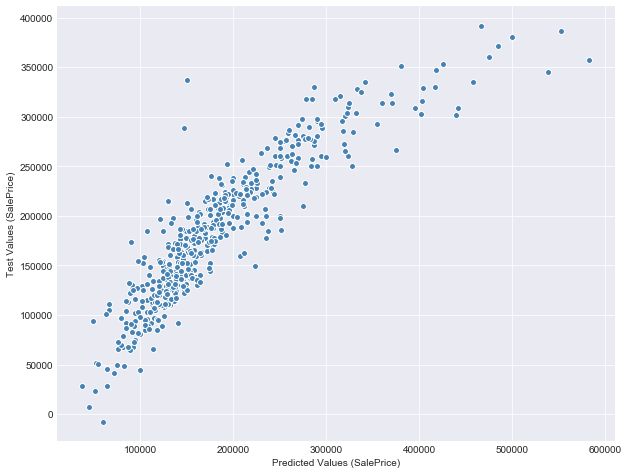

In [18]:
plt.figure(figsize = (10,8))
plt.scatter(y_test, y_test_predict, 
            c='steelblue', marker = 'o', edgecolor = 'white', label = 'Training data')
plt.xlabel('Predicted Values (SalePrice)')
plt.ylabel('Test Values (SalePrice)')

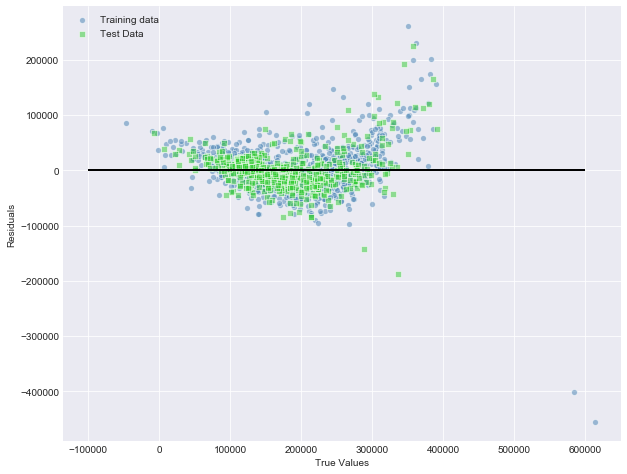

In [19]:
plt.figure(figsize = (10,8))
plt.scatter(y_train_predict, y_train - y_train_predict,
            c='steelblue', marker = 'o', edgecolor = 'white', label = 'Training data', alpha =0.5)
plt.scatter(y_test_predict, y_test - y_test_predict,
           c='limegreen', marker = 's', edgecolor = 'white', label = 'Test Data', alpha = 0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y=0, xmin = -100000, xmax =600000, color = 'black', lw=2)
plt.show()

In [22]:
pd.DataFrame({
    "X":predictors,
    "coefs": np.ravel(model.coef_)
})

,X,coefs
0,Overall Qual,32382.229366
1,Gr Liv Area,21183.529009
2,Garage Area,6358.257735
3,Garage Cars,4874.470389
4,Total Bsmt SF,5886.008958
5,1st Flr SF,7124.211890
6,Garage Yr Blt,4506.841477
7,Year Built,4506.841477


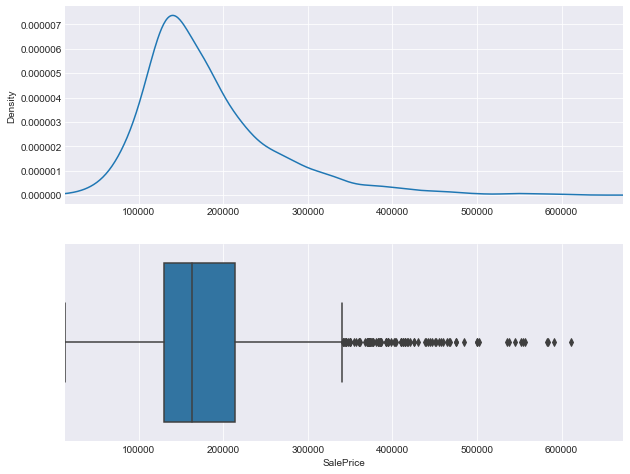

In [25]:
var = train_df['SalePrice']

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(var.min(), var.max()*1.1)
 
ax = var.plot(kind='kde')
 
plt.subplot(212)
plt.xlim(var.min(), var.max()*1.1)
sns.boxplot(x=var, orient = 'h')

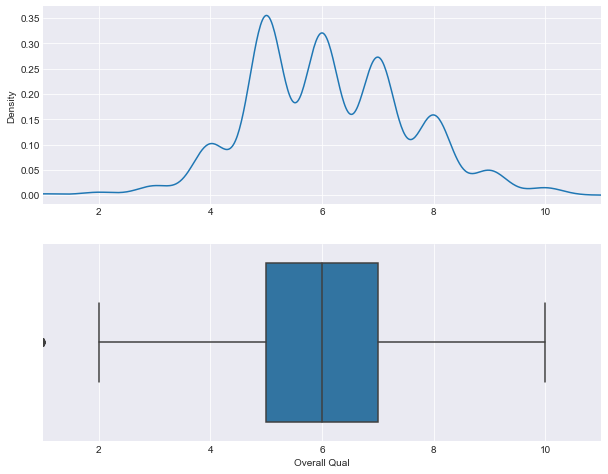

In [26]:
# Starting from the top of the list, looking for outliers:
var = train_df['Overall Qual']

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(var.min(), var.max()*1.1)
 
ax = var.plot(kind='kde')
 
plt.subplot(212)
plt.xlim(var.min(), var.max()*1.1)
sns.boxplot(x=var, orient = 'h')

#This is an ordinal category, makes sense that there aren't any outlers.

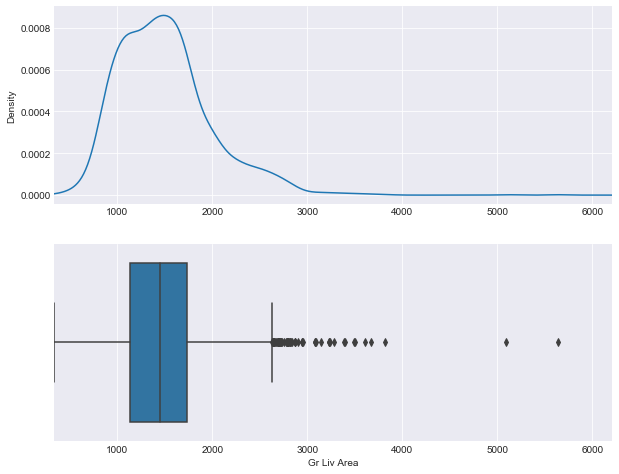

In [27]:
var = train_df['Gr Liv Area']

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(var.min(), var.max()*1.1)
 
ax = train_df['Gr Liv Area'].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(var.min(), var.max()*1.1)
sns.boxplot(x=var, orient = 'h')

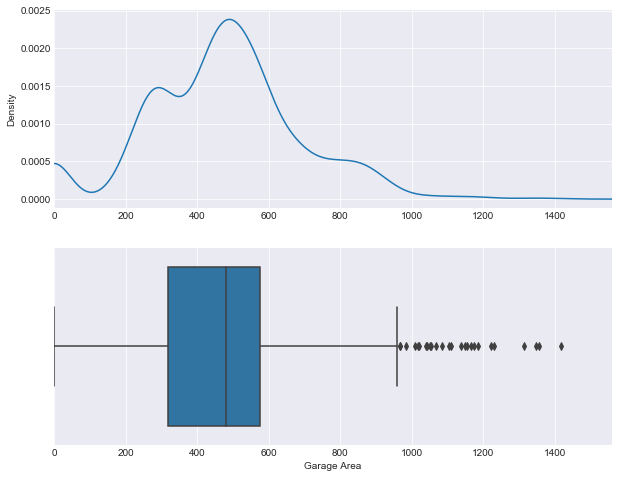

In [28]:
var = train_df['Garage Area']

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(var.min(), var.max()*1.1)
 
ax = var.plot(kind='kde')
 
plt.subplot(212)
plt.xlim(var.min(), var.max()*1.1)
sns.boxplot(x=var, orient = 'h')

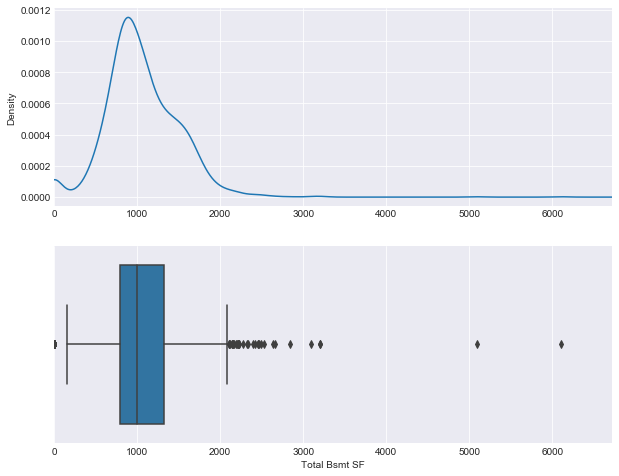

In [29]:
var = train_df['Total Bsmt SF']

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(var.min(), var.max()*1.1)
 
ax = var.plot(kind='kde')
 
plt.subplot(212)
plt.xlim(var.min(), var.max()*1.1)
sns.boxplot(x=var, orient = 'h')

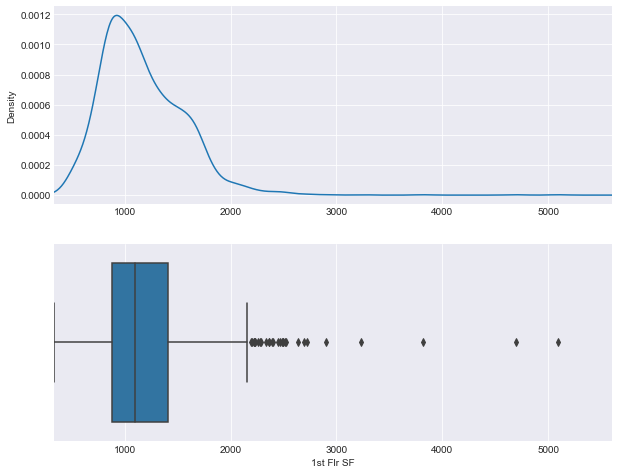

In [24]:
var = train_df['1st Flr SF']

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(var.min(), var.max()*1.1)
 
ax = var.plot(kind='kde')
 
plt.subplot(212)
plt.xlim(var.min(), var.max()*1.1)
sns.boxplot(x=var, orient = 'h')